In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6


In [3]:
dataset = pd.read_csv("D:\DATAS\AirPassengers.csv")

Month          144
#Passengers    144
dtype: int64

In [4]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
dataset.shape

(144, 2)

In [7]:
dataset.count()

Month          144
#Passengers    144
dtype: int64

In [11]:
dateparser = lambda dates:pd.datetime.strptime(dates,"%Y-%m")
dataset = pd.read_csv("D:\DATAS\AirPassengers.csv",parse_dates = ['Month'],index_col = "Month",date_parser = dateparser)
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


parse-dates: specifies the column which contains datetime information.

date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas 
reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. 
Something similar to the dataparse function defined here can be used for this purpose.

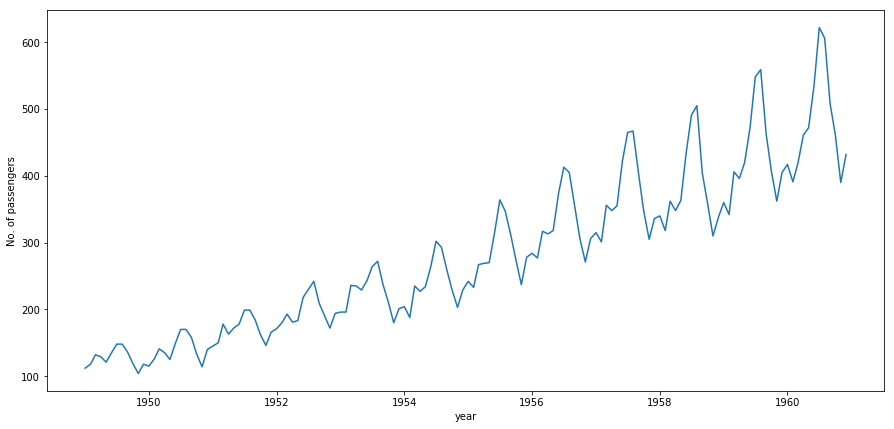

In [16]:
plt.figure(figsize = (15,7))
plt.xlabel("year")
plt.ylabel("No. of passengers")
plt.plot(dataset)

In [17]:
roll_mean = dataset.rolling(12).mean()
roll_std = dataset.rolling(12).std()
print("roll_mean",roll_mean)
print("roll_std", roll_std)

roll_mean             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-0

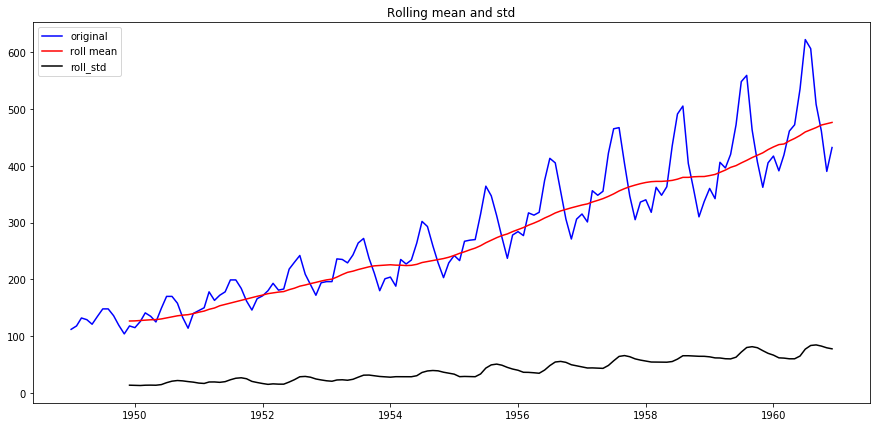

In [19]:
plt.figure(figsize = (15,7))
plt.plot(dataset,color = 'blue', label = 'original')
plt.plot(roll_mean, color = 'red',label = 'roll mean')
plt.plot(roll_std, color = 'black',label = 'roll_std')
plt.legend(loc='best')
plt.title("Rolling mean and std")
plt.show(block = False)

From the above plot, we see that variance and mean are not constant. So, our dataset is not stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [23]:
print("Results of Dickey-Fuller test:")
dftest = adfuller(dataset["#Passengers"], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4] ,index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


here, the p-value is very large and also the critical value is less than the Test Statistic. So, we cannot reject the null hypothesis i.e dataset is stationary.

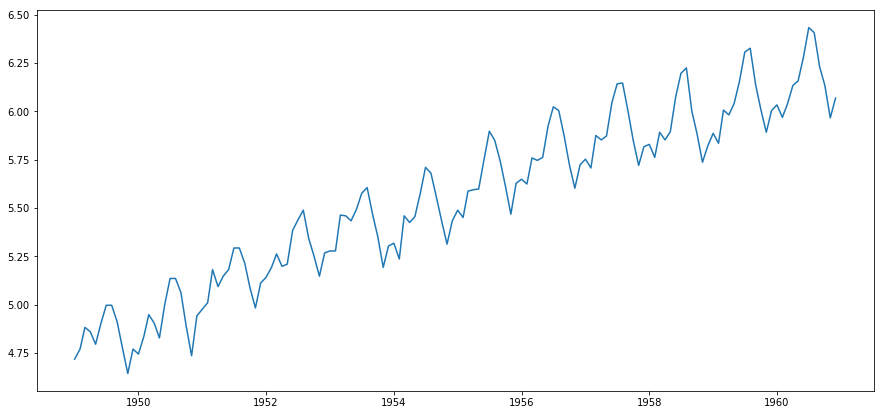

In [26]:
plt.figure(figsize = (15,7))
logscale_dataset = np.log(dataset)
plt.plot(logscale_dataset)


In [27]:
moving_avg = logscale_dataset.rolling(12).mean()
moving_std = logscale_dataset.rolling(12).std()


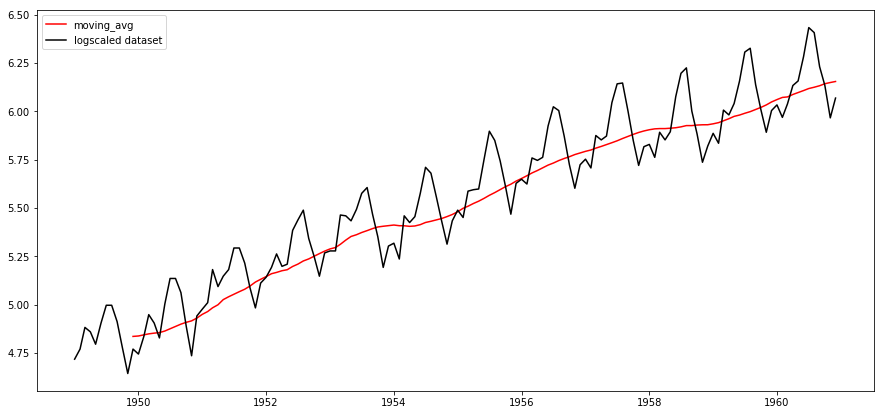

In [31]:
plt.figure(figsize=(15,7))
plt.plot(moving_avg,color = 'red',label = 'moving_avg')
plt.plot(logscale_dataset,color = 'black', label = 'logscaled dataset')
plt.legend(loc= 'best')


here, again mean is not stationary.

In [34]:
dataset_logscale_minus_moving_avg = logscale_dataset - moving_avg
dataset_logscale_minus_moving_avg.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [35]:
# Removing NAN values
dataset_logscale_minus_moving_avg.dropna(inplace = True)

In [45]:
dataset_logscale_minus_moving_avg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingavg= timeseries.rolling(12).mean()
    movingstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(movingavg, color='red', label='Rolling Mean')
    plt.plot(movingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

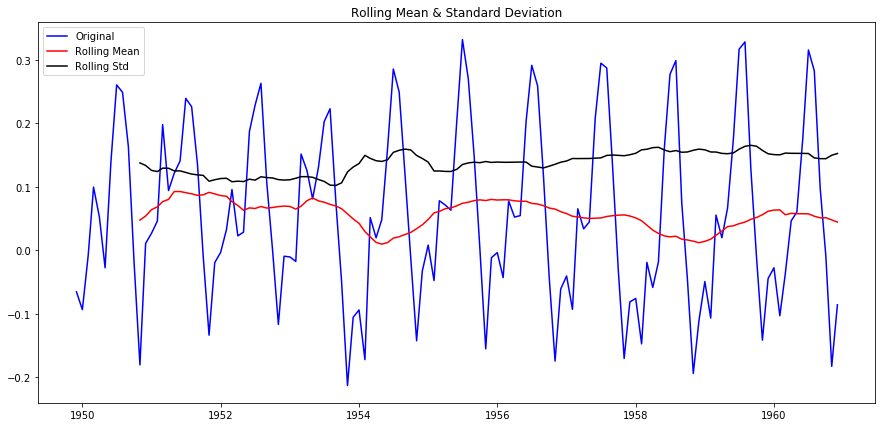

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [53]:
test_stationarity(dataset_logscale_minus_moving_avg)

Here, p-value is relatively less and critical value and test statistics are almost equal.

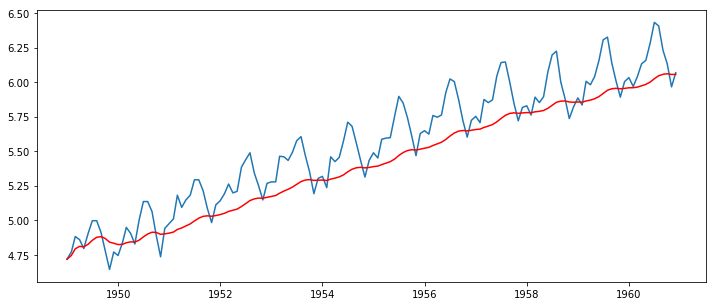

In [54]:
exponentialdecayweightedavg = logscale_dataset.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.figure(figsize = (12,5))
plt.plot(logscale_dataset)
plt.plot(exponentialdecayweightedavg, color = 'red')

here, as the timeseries progressing , the average also progressing towards the higher side

In [55]:
logscaledataset_minus_exponentailweightedavg = logscale_dataset - exponentialdecayweightedavg

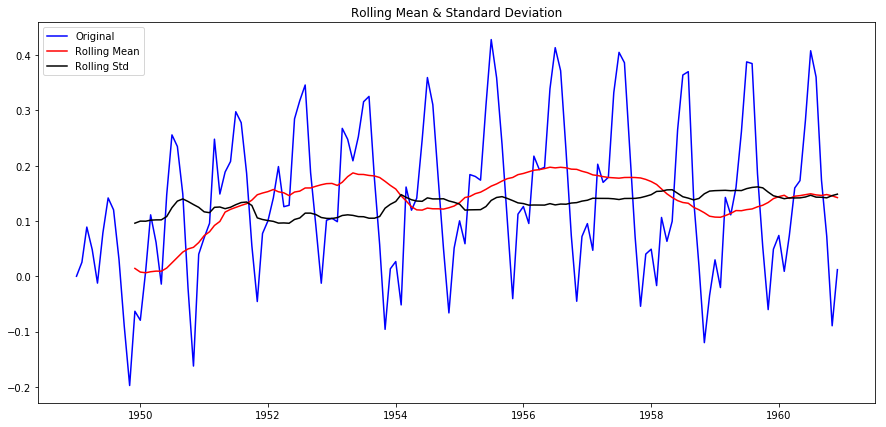

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [56]:
test_stationarity(logscaledataset_minus_exponentailweightedavg)

From the above plot, we see that rolling std is almost not varying and p-value is very less as compared to previous one.

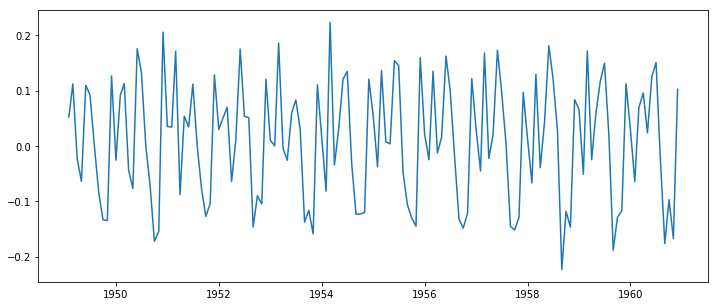

In [59]:
datasetlogdiffshifting = logscale_dataset - logscale_dataset.shift()
plt.figure(figsize = (12,5))
plt.plot(datasetlogdiffshifting)

In [60]:
datasetlogdiffshifting.dropna(inplace = True)

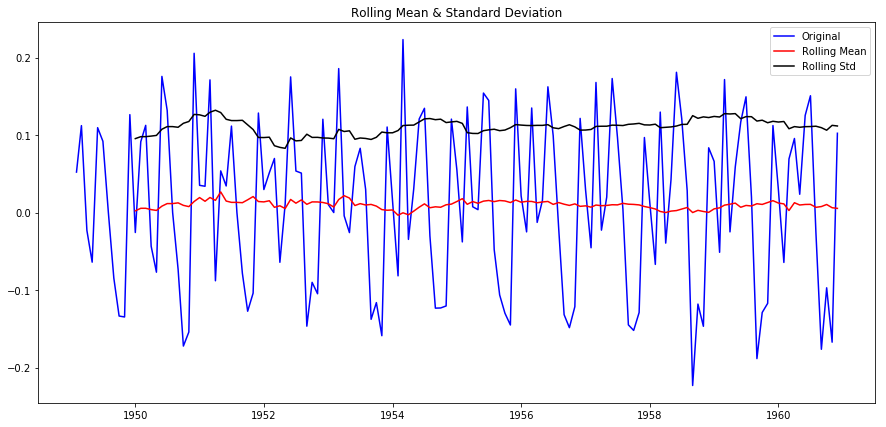

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [61]:
test_stationarity(datasetlogdiffshifting)

From the above plot, we see that now our dataset is stationary.

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(logscale_dataset)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

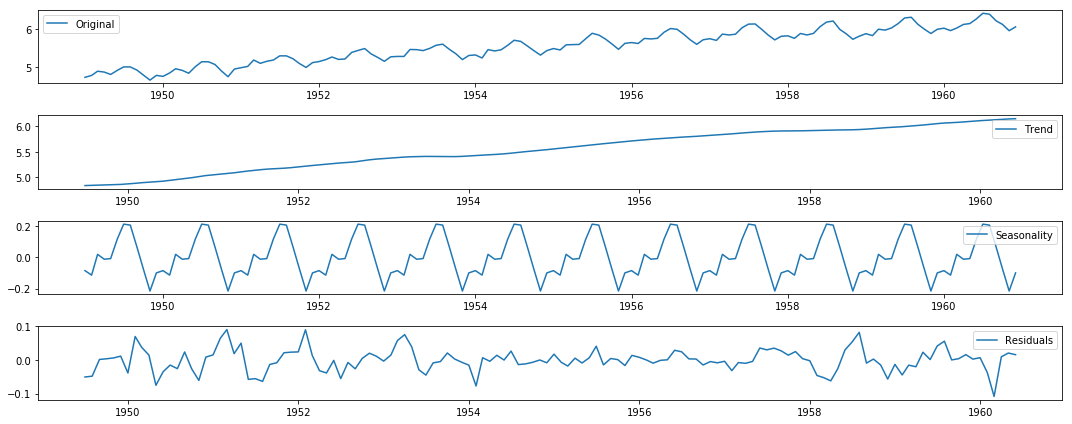

In [67]:
plt.figure(figsize = (15,6))
plt.subplot(411)
plt.plot(logscale_dataset, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [68]:
logscale_dataset_decomposed = residual
logscale_dataset_decomposed.dropna(inplace=True)

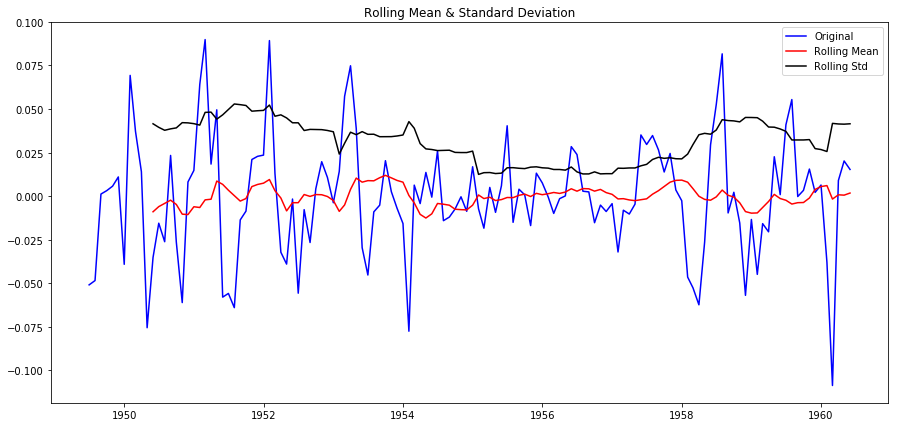

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [69]:
test_stationarity(logscale_dataset_decomposed)

In [70]:
from statsmodels.tsa.stattools import acf, pacf

In [71]:
lag_acf = acf(datasetlogdiffshifting, nlags=20)
lag_pacf = pacf(datasetlogdiffshifting, nlags=20, method='ols')

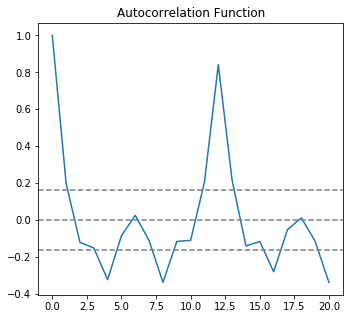

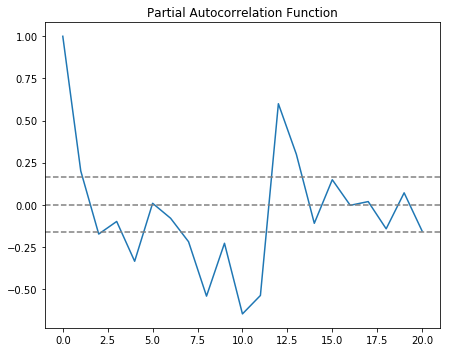

In [75]:
#Plot ACF:
plt.figure(figsize = (12,5))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.figure(figsize=(12,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [76]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

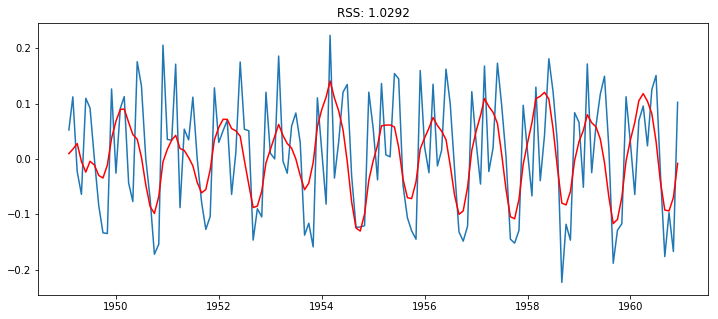

In [80]:
#AR model
model = ARIMA(logscale_dataset, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize = (12,5))
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

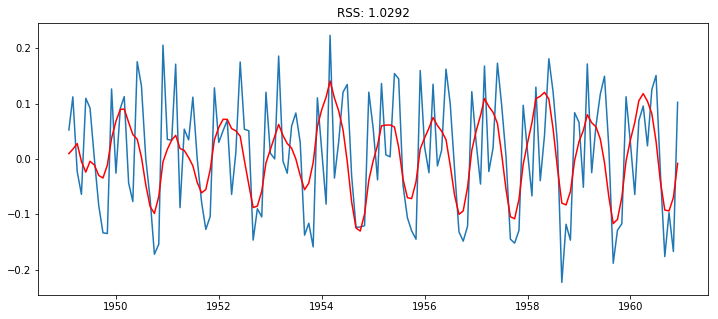

In [85]:
#MA model
model = ARIMA(logscale_dataset, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)
plt.figure(figsize = (12,5))
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

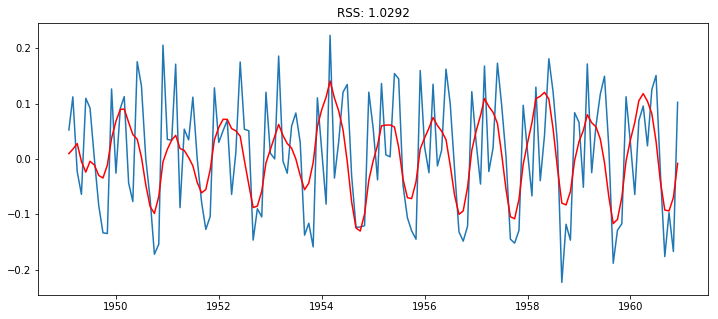

In [87]:
#Combined Model
model = ARIMA(logscale_dataset, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize = (12,5))
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))


In [89]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [90]:
#calculate cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [96]:
predictions_ARIMA_log = pd.Series(logscale_dataset["#Passengers"].ix[0], index=logscale_dataset.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

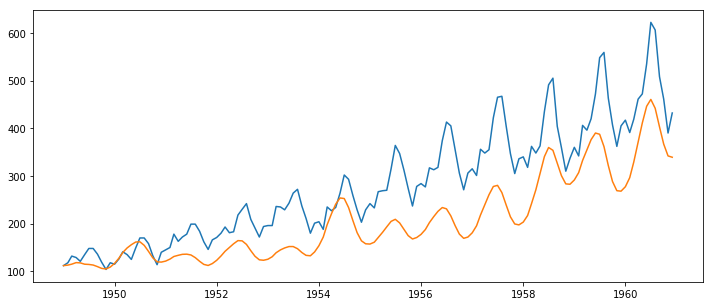

In [97]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize = (12,5))
plt.plot(dataset)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [98]:
logscale_dataset

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


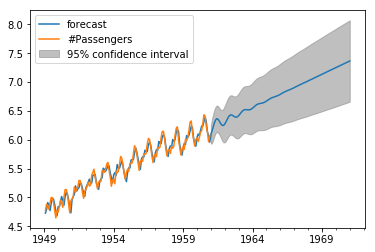

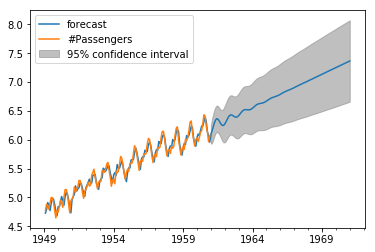

In [101]:
results_ARIMA.plot_predict(1,264)

In [102]:
results_ARIMA.forecast(steps = 120)

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176, 6.27275854, 6.30940339, 6.35151523,
        6.3898868 , 6.41727396, 6.43011056, 6.42906679, 6.41842471,
        6.40456136, 6.39403601, 6.39183078, 6.4001951 , 6.41833709,
        6.4429543 , 6.46937459, 6.49294005, 6.51024129, 6.51989034,
        6.52267571, 6.52112375, 6.51864515, 6.51853682, 6.52311922,
        6.53322368, 6.54812884, 6.56591575, 6.58410326, 6.60036553,
        6.61313274, 6.62192782, 6.62737784, 6.63093122, 6.63438683,
        6.63937982, 6.64696507, 6.65739849, 6.67015337, 6.68414265,
        6.69806639, 6.71077911, 6.72157738, 6.73033985, 6.73749809,
        6.74386376, 6.75037321, 6.75782594, 6.76668687, 6.77699831,
        6.78841329, 6.80032865, 6.81207205, 6.82308768, 6.83307141,
        6.84202495, 6.85022313, 6.85811222, 6.86617342, 6.87479154,
        6.88416308, 6.89426391, 6.90487898, 6.91